In [1]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [7]:
pwd

'C:\\Users\\alice\\Documents\\GitHub\\icerm-tda-2019-08\\2021-06\\SECTIONE'

In [8]:
import sys
sys.path.append('C:\\Users\\alice\\Documents\\GitHub\\icerm-tda-2019-08\\figures')
from Python_code import examples as eg
import numpy as np
from numpy import *
from ripser import ripser

In [9]:
lamb= [0, .5, 1]
prime= 23
toll= 1e-3

In [10]:
points = eg.annulus_example(R=1.5,d=1.5,n=300,Jacobian=False)


In [ ]:
from ripser import ripser
import scipy as spy

prime=23
data_ripser = ripser(points, coeff=prime, do_cocycles=True)

def boundary_cocycles(rout, epsilon):
    # Construct 𝛿⁰
    distances = rout["dperm2all"]
    edges = array((distances<=epsilon).nonzero()).T

    I = c_[arange(edges.shape[0]),arange(edges.shape[0])]
    I = I.flatten()
    J = edges.flatten()
    V = c_[-1 * ones(edges.shape[0]), ones(edges.shape[0])]
    V = V.flatten()

    Delta = spy.sparse.coo_matrix((V,(I,J)), shape=(edges.shape[0], distances.shape[0]))
    # Extract the cocycles
    cocycles = []
    for cocycle in rout["cocycles"][1]:
        val = cocycle[:,2]
        val[val > (prime-1)/2] -= prime
        Y = spy.sparse.coo_matrix((val,(cocycle[:,0],cocycle[:,1])), shape=(distances.shape[0],distances.shape[0]))
        Y = Y - Y.T
        Z = zeros((Delta.shape[0],))
        Z = Y[edges[:,0],edges[:,1]]
        cocycles.append(Z)
    return Delta,cocycles


longest = np.diff(data_ripser["dgms"][1]).argmax()
epsilon = data_ripser["dgms"][1][longest][0]+.01

In [17]:
data_ripser["dgms"][1][longest]

array([0.43612924, 2.77387881])

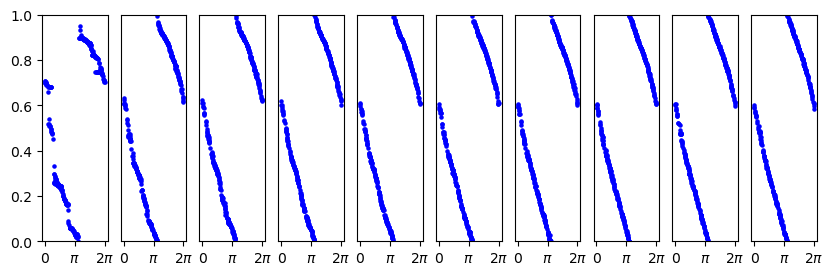

In [28]:
figure(figsize=(10,3),dpi=100)
for i,epsilon in enumerate(linspace(0.4361293, 2.77387881,10)):
    Delta, cocycles = boundary_cocycles(data_ripser, epsilon)

    Z = cocycles[longest]
    zDx = spy.sparse.linalg.lsqr(Delta, array(Z).squeeze())
    gcc = mod(array(zDx[0]), 1.0)

    eg = 'threshold'
    theta = [2*pi-arccos(x/norm([x,y], ord=2)) if arcsin(y/norm([x,y], ord=2))<0 else arccos(x/norm([x,y], ord=2)) for x,y in points]

    plt.subplot(1,10,i+1)
    scatter(theta,gcc,c='b',s=5)
    title('{}')
    if i>0:
        yticks([])
    xticks([0,pi,2*pi],[0,'$\pi$','2$\pi$'])
    ylim(0,1)
savefig(eg+'-1.pdf',format='pdf')